In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
import numpy as np
from load_data_and_distribution_analisys import load_dataset_cleaned, split_dataset_v1, plot_confusion_matrix
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
dataset = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2
   sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1

In [28]:
X_smoke, y_smoke, X_drink, y_drink = split_dataset_v1(dataset)

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, y_smoke, test_size=0.4, random_state=42)
print(X_train_s.shape, X_test_s.shape, y_train_s.shape, y_test_s.shape)

In [ ]:
y_train_binary_s = np.where(y_train_s == 1, 0, 1)  # 0 = NON FUMATORE, 1 = EX FUMATORE o FUMATORE
y_test_binary_s = np.where(y_test_s == 1, 0, 1) 

In [ ]:
model = {
    "svc": Pipeline([("scaler", StandardScaler()), ("svc", LinearSVC(random_state=42, class_weight='balanced'))]),
    "knn": Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=500, n_jobs=-1))]),
    "rf": Pipeline([("random_forest", RandomForestClassifier(n_estimators=100, max_depth=50, min_samples_split=50, random_state=42, class_weight='balanced', n_jobs=-1))]),
    "adaboost": Pipeline([("adaboost", AdaBoostClassifier(n_estimators=100, random_state=42))])
}

In [32]:
estimators = [
    ('svc', model["svc"]),
    ('rf', model["rf"]),
    ('knn', model["knn"]),
    ('adaboost', model["adaboost"])
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LinearSVC(), n_jobs=-1, cv=2)

In [ ]:
stacking.fit(X_train_s, y_train_binary_s)

/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/marcodeano/venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


StackingClassifier(cv=2,
                   estimators=[('svc',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('svc',
                                                 LinearSVC(class_weight='balanced',
                                                           random_state=42))])),
                               ('rf',
                                Pipeline(steps=[('random_forest',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=50,
                                                                        min_samples_split=50,
                                                                        n_jobs=-1,
                                                                        random_state=42))])),
                               ('knn',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('knn',
                                                 KNeighborsClassifier(n_jobs=-1,
                                                                      n_neighbors=500))])),
                               ('adaboost',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('adaboost',
                                                 AdaBoostClassifier(n_estimators=100,
                                                                    random_state=42))]))],
                   final_estimator=LinearSVC(), n_jobs=-1)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83    119799
           1       0.70      0.91      0.79     77216

    accuracy                           0.81    197015
   macro avg       0.81      0.83      0.81    197015
weighted avg       0.84      0.81      0.81    197015



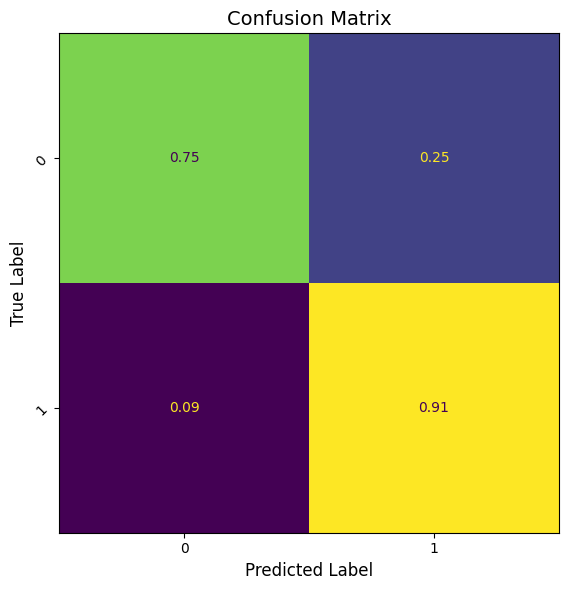

In [ ]:
y_pred_s = stacking.predict(X_test_s)

report = classification_report(y_test_binary_s, y_pred_s)
print(report)
plot_confusion_matrix(y_test_s, y_pred_s, stacking.classes_, "Confusion Matrix", cmap='viridis')

In [ ]:
idx = np.where(y_test_s == 2)[0]
X_ex_smoke = X_test_s.iloc[idx]
y_ex_smoke = y_test_s.iloc[idx]
print(X_ex_smoke.shape, y_ex_smoke.shape)

idx = np.where(y_test_s == 3)[0]
X_actual_smoke = X_test_s.iloc[idx]
y_actual_smoke = y_test_s.iloc[idx]
print(X_actual_smoke.shape, y_actual_smoke.shape)

X_smoke = pd.concat([X_ex_smoke, X_actual_smoke])
y_smoke = np.concatenate((y_ex_smoke, y_actual_smoke))
print(X_smoke.shape, y_smoke.shape)

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_smoke, y_smoke, test_size=0.4, random_state=42)
print(X_train_s.shape, X_test_s.shape, y_train_s.shape, y_test_s.shape)

In [ ]:
pipelines = {
    "forest": Pipeline([("forest", RandomForestClassifier(random_state=42, max_depth=20, min_samples_split=50, n_estimators=100, class_weight="balanced"))]),
    "adaboost": Pipeline([("adaboost", AdaBoostClassifier(n_estimators=200, random_state=42))]),
    "svm": Pipeline([("scaler", StandardScaler()), ("svm", LinearSVC(random_state=42, C=0.1, class_weight="balanced"))]),
    "knn": Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=500, n_jobs=-1))]),
}

In [ ]:
for name, pipeline in pipelines.items():
    print(f"Training {name}...", end=" ")
    t0 = time.time()

    pipeline.fit(X_train_s, y_train_s)  
    
    print(f"took {time.time() - t0:.2f} seconds")

In [ ]:
for name, pipeline in pipelines.items():
    y_pred_drink = pipeline.predict(X_test_s)

    report_drink = classification_report(y_test_s, y_pred_drink)

    print(f"Classification report per {name}:")
    print(report_drink)

    plot_confusion_matrix(y_test_s, y_pred_drink, ["Y", "N"], f"Confusion Matrix per {name}")